In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [3]:
## On charge notre dataframe nettoyé:
df= pd.read_csv('consoBat_df9.csv')

In [4]:
df.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,189.000000,7456910.0,2003882.00,3946027.0,1276453.0,False,Compliant,249.98,2.83,89
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,179.399994,8664479.0,0.00,3242851.0,5145082.0,False,Compliant,295.86,2.86,20
2,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,224.000000,6946800.5,2214446.25,2768924.0,1811213.0,False,Compliant,286.43,4.67,90
3,10,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,7,...,154.699997,6062767.5,0.00,2811215.0,2947580.0,False,Compliant,176.14,2.12,90
4,11,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,7,...,152.300003,7067881.5,2276286.50,3636655.0,385189.0,False,Compliant,221.51,2.16,90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OSEBuildingID                  1358 non-null   int64  
 1   BuildingType                   1358 non-null   object 
 2   PrimaryPropertyType            1358 non-null   object 
 3   PropertyName                   1358 non-null   object 
 4   Address                        1358 non-null   object 
 5   City                           1358 non-null   object 
 6   State                          1358 non-null   object 
 7   ZipCode                        1358 non-null   float64
 8   TaxParcelIdentificationNumber  1358 non-null   object 
 9   CouncilDistrictCode            1358 non-null   int64  
 10  Neighborhood                   1358 non-null   object 
 11  Latitude                       1358 non-null   float64
 12  Longitude                      1358 non-null   f

In [6]:
# On sépare les variables numériques des variables catégorielles:
var_num= df.select_dtypes(include=['int64','float64'])
var_categ= df.select_dtypes(exclude=['int64','float64','bool']) 

In [7]:
var_categ.head()

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,ComplianceStatus
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,Compliant
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Compliant
2,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,Compliant
3,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,0660000825,DOWNTOWN,Hotel,Hotel,Compliant
4,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,0660000955,DOWNTOWN,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,Compliant


In [8]:
var_categ.nunique()

BuildingType                        5
PrimaryPropertyType                21
PropertyName                     1355
Address                          1342
City                                1
State                               1
TaxParcelIdentificationNumber    1303
Neighborhood                       18
ListOfAllPropertyUseTypes         288
LargestPropertyUseType             50
ComplianceStatus                    4
dtype: int64

On écarte les variables catégorielles qui représentent des constantes:

In [9]:
var_categ= var_categ.drop(['BuildingType','City','State'],axis=1)

In [10]:
var_categ.head()

,PrimaryPropertyType,PropertyName,Address,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,ComplianceStatus
0,Hotel,Mayflower park hotel,405 Olive way,0659000030,DOWNTOWN,Hotel,Hotel,Compliant
1,Hotel,Paramount Hotel,724 Pine street,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Compliant
2,Hotel,HOTEL MAX,620 STEWART ST,0659000640,DOWNTOWN,Hotel,Hotel,Compliant
3,Hotel,Camlin,1619 9th Avenue,0660000825,DOWNTOWN,Hotel,Hotel,Compliant
4,Other,Paramount Theatre,911 Pine St,0660000955,DOWNTOWN,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,Compliant


In [11]:
#Sélection des variables catégorielles pertinentes pour notre modèle:
var_categ= var_categ.drop(['PropertyName','Address','TaxParcelIdentificationNumber','ListOfAllPropertyUseTypes'],axis=1)

In [12]:
var_categ.columns.tolist()

['PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType',
 'ComplianceStatus']

On s'intéresse maintenant aux variables numériques:

In [13]:
var_num.columns

Index(['OSEBuildingID', 'ZipCode', 'CouncilDistrictCode', 'Latitude',
       'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'BuildingAge'],
      dtype='object')

Dans cette partie de modélisation, on séléctionne la variables target: (SiteEnergyUseWN(kBtu) au lieu de (SiteEUIWN(kBtu/sf)) qui prend pas en compte la surface du site.  

In [14]:
var_num= var_num.drop(['SiteEUIWN(kBtu/sf)'],axis=1)

On écarte les variables non pertinentes pour notre modèle:

In [15]:
var_num= var_num.drop(['OSEBuildingID','ZipCode','CouncilDistrictCode','Latitude','Longitude'],axis=1)

On écarte les variables (SteamUse(kBtu)), (Electricity(kBtu)),(NaturalGas(kBtu)) qui représentent des relevés et ne doivent pas être pris en compte par souci de data leakage.

On écarte également les 2 variables, (SourceEUIWN(kBtu/sf)),(GHGEmissionsIntensity), qui sont équivalentes aux variables target divisé par une unité de surface.

In [16]:
var_num= var_num.drop(['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','SourceEUIWN(kBtu/sf)','GHGEmissionsIntensity'],axis=1)

In [17]:
var_num.columns.tolist()

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissions',
 'BuildingAge']

In [18]:
df_filter= pd.concat([var_categ, var_num], axis=1)

In [19]:
df_filter.head()

,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,ComplianceStatus,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,BuildingAge
0,Hotel,DOWNTOWN,Hotel,Compliant,1.0,12,88434,0,88434,88434.0,60.0,7456910.0,249.98,89
1,Hotel,DOWNTOWN,Hotel,Compliant,1.0,11,103566,15064,88502,83880.0,61.0,8664479.0,295.86,20
2,Hotel,DOWNTOWN,Hotel,Compliant,1.0,10,61320,0,61320,61320.0,56.0,6946800.5,286.43,90
3,Hotel,DOWNTOWN,Hotel,Compliant,1.0,11,83008,0,83008,81352.0,27.0,6062767.5,176.14,90
4,Other,DOWNTOWN,Other - Entertainment/Public Assembly,Compliant,1.0,8,102761,0,102761,102761.0,NaN,7067881.5,221.51,90


In [20]:
df_filter.shape

(1358, 14)

In [21]:
df_filter.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Large Office', 'Retail Store', 'University', 'Residence Hall',
       'Warehouse', 'Distribution Center', 'Senior Care Community',
       'Worship Facility', 'Medical Office',
       'Supermarket / Grocery Store', 'Refrigerated Warehouse',
       'Low-Rise Multifamily', 'Restaurant', 'Laboratory', 'Hospital'],
      dtype=object)

On prépare le feature (PrimaryPropertyType) pour l'encodage OneHotEncoder:

In [22]:
def PropertyType_preprocessing(text):
    """
    Function to Preprocess the features PrimaryPropertyType .
    """
    text= text.lower()  # converts all uppercase characters to lowercase
    text = text.replace("/", "")    # Remove slash
    text = text.replace("-", "")    # Remove dash
    text = text.replace(" ", "")    # Remove whitespaces
    text = text.replace("12", "twelve")
    return text

df_filter['PrimaryPropertyType'] = df_filter['PrimaryPropertyType'].apply(lambda x: PropertyType_preprocessing(x))

In [23]:
df_filter.PrimaryPropertyType.unique()

array(['hotel', 'other', 'mixeduseproperty', 'ktwelveschool',
       'smallandmidsizedoffice', 'selfstoragefacility', 'largeoffice',
       'retailstore', 'university', 'residencehall', 'warehouse',
       'distributioncenter', 'seniorcarecommunity', 'worshipfacility',
       'medicaloffice', 'supermarketgrocerystore',
       'refrigeratedwarehouse', 'lowrisemultifamily', 'restaurant',
       'laboratory', 'hospital'], dtype=object)

In [24]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PrimaryPropertyType        1358 non-null   object 
 1   Neighborhood               1358 non-null   object 
 2   LargestPropertyUseType     1358 non-null   object 
 3   ComplianceStatus           1358 non-null   object 
 4   NumberofBuildings          1358 non-null   float64
 5   NumberofFloors             1358 non-null   int64  
 6   PropertyGFATotal           1358 non-null   int64  
 7   PropertyGFAParking         1358 non-null   int64  
 8   PropertyGFABuilding(s)     1358 non-null   int64  
 9   LargestPropertyUseTypeGFA  1358 non-null   float64
 10  ENERGYSTARScore            896 non-null    float64
 11  SiteEnergyUseWN(kBtu)      1358 non-null   float64
 12  TotalGHGEmissions          1358 non-null   float64
 13  BuildingAge                1358 non-null   int64

In [25]:
# on charge le df_filter dans un fichier csv:
df_filter.to_csv('consoBat_df_filter.csv',index=False)

### Prédiction de la variable d'émission: (TotalGHGEmissions), sans le feature (ENERGYSTARScore)

#### Préparation du preprocessor:

In [26]:
# Importation des bibliothèques nécessaires:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso,  ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [27]:
len(df_filter.columns)

14

##### On définit les variables X et y:

In [28]:
# On écarte les 2 variables de prédictions et la variable (ENERGYSTARScore) avec les données manquantes:
X=df_filter.drop(['TotalGHGEmissions','SiteEnergyUseWN(kBtu)','ENERGYSTARScore'],axis=1)

In [29]:
len(X.columns)

11

In [30]:
y= df_filter['TotalGHGEmissions']

##### On split les données entre Training set et Test set:

In [31]:
#spliting data to training/test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# dimensions X_train et X_test
print(X_train.shape)
print(X_test.shape)

(950, 11)
(408, 11)


On a un dataframe avec des variables catégorielles et numériques, donc on fait appel à (make_column_transformer)

In [33]:
col_categ= var_categ.columns.tolist()

In [34]:
len(col_categ)

4

In [35]:
col_num= var_num.columns.tolist()

In [36]:
col_num

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEnergyUseWN(kBtu)',
 'TotalGHGEmissions',
 'BuildingAge']

In [37]:
#On écarte les 2 variables de prédictions et la variable (ENERGYSTARScore) avec données manquantes.
remove_lst= ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions','ENERGYSTARScore']
for x in remove_lst:
    print (x), col_num.remove(x)       

SiteEnergyUseWN(kBtu)
TotalGHGEmissions
ENERGYSTARScore


In [38]:
# Vérification:
col_num

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'BuildingAge']

In [39]:
# Application de make_column_transformer car différent type de preprocessing requis pour les features.
column_trans= make_column_transformer((OneHotEncoder(handle_unknown='ignore') ,col_categ), (StandardScaler(), col_num))

#### Application du modèle basique de regression: LinearRegression

In [40]:
lr = LinearRegression()
# On crée le modèle à l'aide de pipeline
pipe_lr= make_pipeline(column_trans,lr)
#Grille de recherche:
parameter= {'linearregression__fit_intercept':[True,False]}
grid_lr= GridSearchCV(pipe_lr, parameter, cv=5,scoring='r2')
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                         

In [41]:
from sklearn import set_config
set_config(display="diagram")
pipe_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType',
                                                   'ComplianceStatus']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA',
                                                   'BuildingAge'])])),
                ('linearregression', LinearRegression())])

In [42]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

0.07745025343712997
{'linearregression__fit_intercept': False}


In [43]:
model_lr= grid_lr.best_estimator_
pred_lr= model_lr.predict(X_test)
r2_score(y_test, pred_lr)

0.29311033825059063

##### Implémentation d'une fonction pour calcul des métriques:

In [44]:
def compute_scores(y_test, prediction):
    """Function which computes RMSE, MSE, MAE, Median AE and R^2 of a prediction compared to true values."""
      
    rmse = mean_squared_error(y_test, prediction, squared=False)
    mse = mean_squared_error(y_test, prediction, squared=True)
    mae = mean_absolute_error(y_test, prediction)
    median_ae = median_absolute_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    
    scores = [rmse, mse, mae, median_ae, r2]
    
    return scores

In [45]:
# calcul des métriques:
compute_scores(y_test, pred_lr)

[51.383437273086045,
 2640.257625997168,
 36.51441708385231,
 24.777131644409856,
 0.29311033825059063]

##### Plot de comparaison entre y_test, pred_lr:

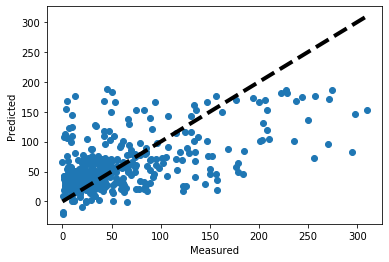

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, pred_lr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

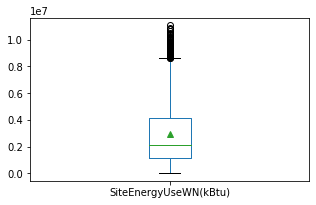

In [47]:
#Vérification:
plt.figure(figsize=(5,3))
df_filter['SiteEnergyUseWN(kBtu)'].plot.box(showmeans=True)

#### Application du modèle: Ridge Regression

In [48]:
# instaciation de l'objet:
ridge= Ridge()
# On crée le modèle à l'aide de pipeline
pipe_ridge= make_pipeline(column_trans,ridge)

##### Cross validation avec: cross_val_score()

In [49]:
cross_val_score(pipe_ridge,X_train,y_train,cv=5,scoring='r2')

array([ 0.22601953,  0.30729295, -0.55646816,  0.24162345,  0.25932549])

##### Optimisation des hyperparamètres avec: GridSearchCV()

In [50]:
# Définition des paramètres:
#le paramètre alpha permet de corriger l'overfitting
parameter= {'ridge__alpha': [5,10,15]}
#Grille de recherche:
grid_ridge= GridSearchCV(pipe_ridge ,parameter, cv=5,scoring='r2')

In [51]:
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [5, 10, 15]}, scoring='r2')

In [52]:
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

0.10145448565042899
{'ridge__alpha': 5}


In [53]:
model_ridge= grid_ridge.best_estimator_
pred_ridge= model_ridge.predict(X_test)
r2_score(y_test, pred_ridge)

0.23990460192032714

In [54]:
# calcul des métriques:
compute_scores(y_test, pred_ridge)

[53.28210687705462,
 2838.9829132578716,
 37.847038914806966,
 26.739984416057748,
 0.23990460192032714]

##### Plot de comparaison entre y_test, pred_ridge:

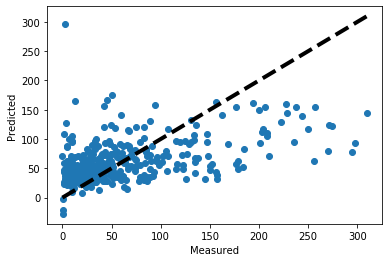

In [55]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_ridge)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Application du modèle: Support Vector Regression

In [56]:
# Instanciation de l'objet:
svr= SVR()
# On crée le modèle à l'aide de pipeline
from sklearn.pipeline import make_pipeline
pipe_svr= make_pipeline(column_trans,svr)

In [57]:
# liste des paramètres de l'estimateur:
pipe_svr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'svr', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__standardscaler', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'svr__C', 'svr__cache_size', 'svr__coef0', 'svr__degree', 'svr__epsilon', 'svr__gamma', 'svr__kernel', 'svr__max_iter', 'svr__shrinking', 'svr__tol', 'svr__verbose'])

In [58]:
# Cross validation avec: cross_val_score()
cross_val_score(pipe_svr,X_train,y_train,cv=5)

array([-0.03915875, -0.07359772,  0.01365795,  0.03277998,  0.00187996])

COMMENTAIRE:

In [59]:
# Optimisation des hyperparamètres avec: GridSearchCV()
parameters = {'svr__kernel': ('poly','linear','rbf')}
#Grille de recherche:
grid_svr= GridSearchCV(pipe_svr,parameters, cv=5,scoring='r2')
grid_svr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__kernel': ('poly', 'linear', 'rbf')},
             scoring='r2')

In [60]:
print(grid_svr.best_score_)
print(grid_svr.best_params_)

0.01595813309431702
{'svr__kernel': 'linear'}


In [61]:
model_svr= grid_svr.best_estimator_
pred_svr= model_svr.predict(X_test)
r2_score(y_test, pred_svr)

0.1873930316908604

In [62]:
# calcul des métriques:
compute_scores(y_test, pred_svr)

[55.09188203209279,
 3035.1154658380283,
 35.30797769893651,
 19.7930655629304,
 0.1873930316908604]

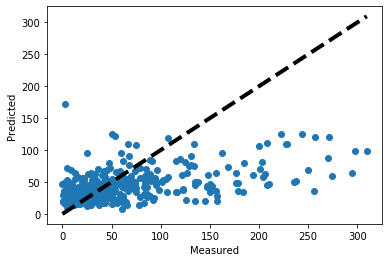

In [63]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_svr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

COMMENTAIRE:

#### Application du modèle: Lasso

Ce modèle est pratique pour écarter les features non pertinents.

In [64]:
lasso= Lasso(tol=0.1)
# On crée le modèle à l'aide de pipeline
pipe_lasso= make_pipeline(column_trans,lasso)

In [65]:
# liste des paramètres de l'estimateur:
pipe_lasso.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'lasso', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__standardscaler', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

In [66]:
# Cross validation avec: cross_val_score()
cross_val_score(pipe_lasso,X_train,y_train,cv=5).mean()

0.058531506665302935

In [67]:
# Optimisation des hyperparamètres avec: GridSearchCV()
parameters = {'lasso__alpha':[60,70,80]}
#Grille de recherche:
grid_lasso= GridSearchCV(pipe_lasso,parameters, cv=5,scoring='r2')
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge'])])),
                                       ('lasso', Lasso(tol=0.1))]),
             param_grid={'lasso__alpha': [60, 70, 80]}, scoring='r2')

In [68]:
print(grid_lasso.best_score_)
print(grid_lasso.best_params_)

-0.005011729347886407
{'lasso__alpha': 60}


In [69]:
model_lasso= grid_lasso.best_estimator_
model_lasso.score(X_test,y_test)

-0.0039546428929231325

In [70]:
pred_lasso= model_lasso.predict(X_test)
# Evaluation des métriques:
compute_scores(y_test, pred_lasso)

[61.23565731742075,
 3749.805727096586,
 45.95119989680082,
 38.43351578947368,
 -0.0039546428929231325]

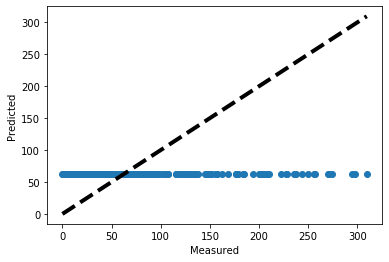

In [71]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_lasso)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Application du modèle: Elastic-Net

In [72]:
elastic= ElasticNet(tol=0.1)
# On crée le modèle à l'aide de pipeline
pipe_elastic= make_pipeline(column_trans,elastic)

In [73]:
# liste des paramètres de l'estimateur:
pipe_elastic.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'elasticnet', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__standardscaler', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'elasticnet__alpha', 'elasticnet__copy_X', 'elasticnet__fit_intercept', 'elasticnet__l1_ratio', 'elasticnet__max_iter', 'elasticnet__normalize', 'elasticnet__positive', 'elasticnet__precompute', 'elasticnet__random_state', 'elast

In [74]:
# Cross validation avec: cross_val_score()
cross_val_score(pipe_elastic,X_train,y_train,cv=5,scoring='r2')

array([ 0.11999896,  0.13542442, -0.25656838,  0.14495393,  0.10615233])

In [75]:
# Optimisation des hyperparamètres avec: GridSearchCV()
parameters = {'elasticnet__l1_ratio':[1e-5,1e-4,1e-3],'elasticnet__alpha':[1e-2,0.1,1]}
#Grille de recherche:
grid_elastic= GridSearchCV(pipe_elastic,parameters, cv=5)
grid_elastic.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge'])])),
                                       ('elasticnet', ElasticNet(tol=0.1))]),
             param_grid={'elasticnet__alpha': [0.01, 0.1, 1],
                         'elasticnet__l1_ratio': [1e-05, 0.0001, 0.001]})

In [76]:
print(grid_elastic.best_score_)
print(grid_elastic.best_params_)

0.10064277853228135
{'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.001}


In [77]:
model_elastic= grid_elastic.best_estimator_
model_elastic.score(X_test,y_test)

0.23722164938411627

In [78]:
pred_elastic= model_elastic.predict(X_test)
# Evaluation des métriques:
compute_scores(y_test, pred_elastic)

[53.3760605035368,
 2849.003834877221,
 37.84233044362799,
 27.07823640549502,
 0.23722164938411627]

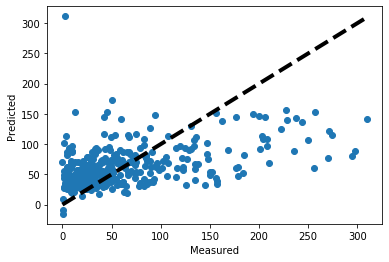

In [79]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_elastic)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Application du modèle: Forests of randomized trees

In [80]:
randomforest= RandomForestRegressor()
# On crée le modèle à l'aide de pipeline
pipe_randomforest= make_pipeline(column_trans, randomforest)

In [81]:
# liste des paramètres de l'estimateur:
pipe_randomforest.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'randomforestregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__standardscaler', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_no

In [82]:
# Cross validation avec: cross_val_score()
cross_val_score(pipe_randomforest,X_train,y_train,cv=5,scoring='r2')

array([0.25736932, 0.3601591 , 0.21942997, 0.30133798, 0.34769583])

In [83]:
parameter= {'randomforestregressor__n_estimators': [100,200,300]}
#Grille de recherche:
grid_randomforest= GridSearchCV(pipe_randomforest, parameter, cv=5)
grid_randomforest.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__n_estimators': [100, 200,
                                                                 300]})

In [84]:
print(grid_randomforest.best_score_)
print(grid_randomforest.best_params_)

0.2959552978696019
{'randomforestregressor__n_estimators': 300}


In [85]:
model_randomforest= grid_randomforest.best_estimator_
model_randomforest.score(X_test,y_test)

0.2932873904919977

In [86]:
pred_randomforest= model_randomforest.predict(X_test)
# Evaluation des métriques:
compute_scores(y_test, pred_randomforest)

[51.377001953005475,
 2639.5963296791288,
 35.8654236111111,
 24.2099999999998,
 0.2932873904919977]

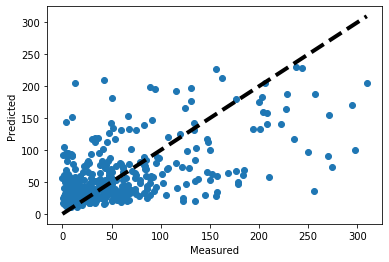

In [87]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_randomforest)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##### Application du modèle: Decision Tree Regression with AdaBoost

In [88]:
adaboost= AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300)
# On crée le modèle à l'aide de pipeline
pipe_adaboost= make_pipeline(column_trans, adaboost)

In [89]:
# liste des paramètres de l'estimateur:
pipe_adaboost.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'adaboostregressor', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__standardscaler', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'adaboostregressor__base_estimator__ccp_alpha', 'adaboostregressor__base_estimator__criterion', 'adaboostregressor__base_estimator__max_depth', 'adaboostregressor__base_estimator__max_features', 'adaboostregressor__base_es

In [90]:
# Cross validation avec: cross_val_score()
cross_val_score(pipe_adaboost,X_train,y_train,cv=5,scoring='r2')

array([-0.21101346,  0.10868563, -0.46944648, -0.4491116 ,  0.15847059])

In [91]:
parameter= {'adaboostregressor__loss': ['linear', 'square', 'exponential'], 
           'adaboostregressor__base_estimator__max_depth':[4,6,8]
           , 'adaboostregressor__n_estimators':[300,400,500]}
#Grille de recherche:
grid_adaboost= GridSearchCV(pipe_adaboost, parameter, cv=5)
grid_adaboost.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge'])])),
                                       ('adaboostregressor',
                                        AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                                                          n_estimators=300))]),
             param_grid={'adaboostregressor__base_estimator__max_depth': [4, 6,
                                                                          8],
                         'adaboostregressor__loss': ['linear', 'square',
                                                     'exponential'],
                         'adaboostregressor__n_estimators': [300, 400, 500]})

In [92]:
print(grid_adaboost.best_score_)
print(grid_adaboost.best_params_)

0.2325731673414583
{'adaboostregressor__base_estimator__max_depth': 8, 'adaboostregressor__loss': 'square', 'adaboostregressor__n_estimators': 500}


In [93]:
model_adaboost= grid_adaboost.best_estimator_
model_adaboost.score(X_test,y_test)

0.16350544304858994

In [94]:
pred_adaboost= model_adaboost.predict(X_test)
# Evaluation des métriques:
compute_scores(y_test, pred_adaboost)

[55.895764109836875,
 3124.336445422528,
 46.13117159197037,
 43.74557917888562,
 0.16350544304858994]

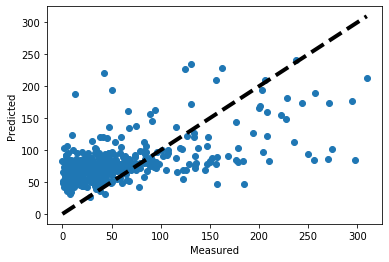

In [95]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_adaboost)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Synthèse des métriques des différents modèle:

In [96]:
lst=[compute_scores(y_test, pred_lr),compute_scores(y_test, pred_ridge),compute_scores(y_test, pred_svr),
     compute_scores(y_test, pred_lasso),compute_scores(y_test, pred_elastic),compute_scores(y_test, pred_randomforest),
    compute_scores(y_test, pred_adaboost)]

In [97]:
lst

[[51.383437273086045,
  2640.257625997168,
  36.51441708385231,
  24.777131644409856,
  0.29311033825059063],
 [53.28210687705462,
  2838.9829132578716,
  37.847038914806966,
  26.739984416057748,
  0.23990460192032714],
 [55.09188203209279,
  3035.1154658380283,
  35.30797769893651,
  19.7930655629304,
  0.1873930316908604],
 [61.23565731742075,
  3749.805727096586,
  45.95119989680082,
  38.43351578947368,
  -0.0039546428929231325],
 [53.3760605035368,
  2849.003834877221,
  37.84233044362799,
  27.07823640549502,
  0.23722164938411627],
 [51.377001953005475,
  2639.5963296791288,
  35.8654236111111,
  24.2099999999998,
  0.2932873904919977],
 [55.895764109836875,
  3124.336445422528,
  46.13117159197037,
  43.74557917888562,
  0.16350544304858994]]

In [98]:
lst=[compute_scores(y_test, pred_lr),compute_scores(y_test, pred_ridge),compute_scores(y_test, pred_svr),
     compute_scores(y_test, pred_lasso),compute_scores(y_test, pred_elastic),compute_scores(y_test, pred_randomforest),
    compute_scores(y_test, pred_adaboost)]
                   
df_metrics_1 = pd.DataFrame(lst, index =['Linear regression','Ridge regression','SVR','Lasso','ElasticNet',
                                                       'RandomForest', 'Adaboost']
                            , columns =['RMSE', 'MSE', 'MAE', 'MEDIAN AE', 'R²'])

In [99]:
df_metrics_1

,RMSE,MSE,MAE,MEDIAN AE,R²
Linear regression,51.383437,2640.257626,36.514417,24.777132,0.293110
Ridge regression,53.282107,2838.982913,37.847039,26.739984,0.239905
SVR,55.091882,3035.115466,35.307978,19.793066,0.187393
Lasso,61.235657,3749.805727,45.951200,38.433516,-0.003955
ElasticNet,53.376061,2849.003835,37.842330,27.078236,0.237222
RandomForest,51.377002,2639.596330,35.865424,24.210000,0.293287
Adaboost,55.895764,3124.336445,46.131172,43.745579,0.163505


Dataframe synthèse des score R² pour le Xtrain

In [100]:
r2_lr= grid_lr.best_score_
r2_ridge= grid_ridge.best_score_
r2_svr= grid_svr.best_score_
r2_lasso= grid_lasso.best_score_
r2_elastic= grid_elastic.best_score_
r2_randomforest= grid_randomforest.best_score_
r2_adaboost= grid_adaboost.best_score_

lst= [r2_lr, r2_ridge, r2_svr, r2_lasso, r2_elastic,r2_randomforest,r2_adaboost]

df_Xtrain_r2= pd.DataFrame(lst, index =['Linear regression','Ridge regression','SVR','Lasso','ElasticNet',
                                                       'RandomForest', 'Adaboost'], columns =['R²'])

In [101]:
df_Xtrain_r2

,R²
Linear regression,0.077450
Ridge regression,0.101454
SVR,0.015958
Lasso,-0.005012
ElasticNet,0.100643
RandomForest,0.295955
Adaboost,0.232573


### Prédiction de la variable d'émission: (TotalGHGEmissions), en incluant le feature (ENERGYSTARScore)

In [102]:
# On écarte les 2 variables de prédictions
X=df_filter.drop(['TotalGHGEmissions','SiteEnergyUseWN(kBtu)'],axis=1)
y= df_filter['TotalGHGEmissions']

In [103]:
#spliting data to training/test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle= True)

In [104]:
print(X_train.shape)
print(X_test.shape)

(950, 12)
(408, 12)


In [105]:
col_num

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'BuildingAge']

In [106]:
# On ajoute la variable (ENERGYSTARScore):
col_num.append('ENERGYSTARScore') 

In [107]:
# Vérification:
col_num

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'BuildingAge',
 'ENERGYSTARScore']

Nouveau pipeline avec cette fois ci l'appliction de SimpleImputer(strategy="median") pour les valeurs manquantes de (ENERGYSTARScore):

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline( steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
categorical_transformer= OneHotEncoder(handle_unknown='ignore')
                                       
                                       
column_trans = ColumnTransformer([("num", numeric_transformer, col_num),("cat", categorical_transformer, col_categ)])
    

#### Application du modèle Linear Regression:

In [109]:
lr = LinearRegression()
# On crée le modèle à l'aide de pipeline
pipe_lr= make_pipeline(column_trans,lr)
#Grille de recherche:
parameter= {'linearregression__fit_intercept':[True,False]}
grid_lr= GridSearchCV(pipe_lr, parameter, cv=5,scoring='r2')
grid_lr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus'])])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False]},
             scoring='r2')

In [110]:
pipe_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'LargestPropertyUseTypeGFA',
                                                   'BuildingAge',
                                                   'ENERGYSTARScore']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PrimaryPropertyType',
                                                   'Neighborhood',
                                                   'LargestPropertyUseType',
                                                   'ComplianceStatus'])])),
                ('linearregression', LinearRegression())])

In [111]:
model_lr= grid_lr.best_estimator_
pred_lr= model_lr.predict(X_test)
r2_score(y_test, pred_lr)

0.30235735068190905

In [112]:
# calcul des métriques:
compute_scores(y_test, pred_lr)

[51.046250704081864,
 2605.7197109439785,
 36.72434684526503,
 25.52694037495377,
 0.30235735068190905]

#### Application du modèle Ridge Regression:

In [113]:
# instaciation de l'objet:
ridge= Ridge()
pipe_ridge= make_pipeline(column_trans,ridge)

In [114]:
cross_val_score(pipe_ridge,X_train,y_train,cv=5,scoring='r2')

array([ 0.27660019,  0.29542403, -0.65402779,  0.27990649,  0.28282756])

In [115]:
# liste des paramètres de l'estimateur:
pipe_ridge.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'ridge', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__num', 'columntransformer__cat', 'columntransformer__num__memory', 'columntransformer__num__steps', 'columntransformer__num__verbose', 'columntransformer__num__imputer', 'columntransformer__num__scaler', 'columntransformer__num__imputer__add_indicator', 'columntransformer__num__imputer__copy', 'columntransformer__num__imputer__fill_value', 'columntransformer__num__imputer__missing_values', 'columntransformer__num__imputer__strategy', 'columntransformer__num__imputer__verbose', 'columntransformer__num__scaler__copy', 'columntransformer__num__scaler__with_mean', 'columntransformer__num__scaler__with_std', 'columntransformer__cat__categories', 'colum

In [116]:
# Définition des paramètres:
#le paramètre alpha permet de corriger l'overfitting
parameter= {'ridge__alpha': [5,10,15]}
#Grille de recherche:
grid_ridge= GridSearchCV(pipe_ridge,parameter, cv=5,scoring='r2')

In [117]:
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [5, 10, 15]}, scoring='r2')

In [118]:
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

0.09993254784155332
{'ridge__alpha': 5}


In [119]:
model_ridge= grid_ridge.best_estimator_

In [120]:
pred_ridge= model_ridge.predict(X_test)

In [121]:
# Evaluation des métriques:
compute_scores(y_test, pred_ridge)

[52.75045639642948,
 2782.6106500316073,
 37.534649517219535,
 27.02409376791411,
 0.2549974359270133]

#### Application du modèle SVR:

In [122]:
# Instanciation de l'objet:
svr= SVR()
# On crée le modèle à l'aide de pipeline
from sklearn.pipeline import make_pipeline
pipe_svr= make_pipeline(column_trans,svr)

In [123]:
# Optimisation des hyperparamètres avec: GridSearchCV()
parameters = {'svr__kernel': ('poly','linear','rbf')}
#Grille de recherche:
grid_svr= GridSearchCV(pipe_svr,parameters, cv=5,scoring='r2')

In [124]:
grid_svr.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__kernel': ('poly', 'linear', 'rbf')},
             scoring='r2')

In [125]:
model_svr= grid_svr.best_estimator_
pred_svr= model_svr.predict(X_test)
r2_score(y_test, pred_svr)

0.20049969998659412

In [126]:
# calcul des métriques:
compute_scores(y_test, pred_svr)

[54.64578301253432,
 2986.161601052984,
 34.85026667274836,
 19.97040777335708,
 0.20049969998659412]

#### Application du modèle Lasso

In [127]:
lasso= Lasso(tol=0.1)
# On crée le modèle à l'aide de pipeline
pipe_lasso= make_pipeline(column_trans,lasso)

In [128]:
# Optimisation des hyperparamètres avec: GridSearchCV()
parameters = {'lasso__alpha':[60,70,80]}
#Grille de recherche:
grid_lasso= GridSearchCV(pipe_lasso,parameters, cv=5,scoring='r2')
grid_lasso.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus'])])),
                                       ('lasso', Lasso(tol=0.1))]),
             param_grid={'lasso__alpha': [60, 70, 80]}, scoring='r2')

In [129]:
model_lasso= grid_lasso.best_estimator_
model_lasso.score(X_test,y_test)

-0.0039546428929231325

In [130]:
pred_lasso= model_lasso.predict(X_test)
# Evaluation des métriques:
compute_scores(y_test, pred_lasso)

[61.23565731742075,
 3749.805727096586,
 45.95119989680082,
 38.43351578947368,
 -0.0039546428929231325]

#### Application du modèle Elastic Net

In [131]:
elastic= ElasticNet(tol=0.1)
# On crée le modèle à l'aide de pipeline
pipe_elastic= make_pipeline(column_trans,elastic)

In [132]:
# Optimisation des hyperparamètres avec: GridSearchCV()
parameters = {'elasticnet__l1_ratio':[1e-5,1e-4,1e-3],'elasticnet__alpha':[1e-2,0.1,1]}
#Grille de recherche:
grid_elastic= GridSearchCV(pipe_elastic,parameters, cv=5)
grid_elastic.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus'])])),
                                       ('elasticnet', ElasticNet(tol=0.1))]),
             param_grid={'elasticnet__alpha': [0.01, 0.1, 1],
                         'elasticnet__l1_ratio': [1e-05, 0.0001, 0.001]})

In [133]:
model_elastic= grid_elastic.best_estimator_
model_elastic.score(X_test,y_test)

0.2514987200732304

In [134]:
pred_elastic= model_elastic.predict(X_test)
# Evaluation des métriques:
compute_scores(y_test, pred_elastic)

[52.87417589137211,
 2795.6784761917556,
 37.54609099770716,
 26.907670075007868,
 0.2514987200732304]

#### Application du modèle Forests of randomized trees

In [135]:
randomforest= RandomForestRegressor()
# On crée le modèle à l'aide de pipeline
pipe_randomforest= make_pipeline(column_trans, randomforest)

In [136]:
parameter= {'randomforestregressor__n_estimators': [100,200,300]}
#Grille de recherche:
grid_randomforest= GridSearchCV(pipe_randomforest, parameter, cv=5)
grid_randomforest.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge',
                                                                          'ENERGYSTARScore']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__n_estimators': [100, 200,
                                                                 300]})

In [137]:
model_randomforest= grid_randomforest.best_estimator_
model_randomforest.score(X_test,y_test)

0.335272160062003

In [138]:
pred_randomforest= model_randomforest.predict(X_test)
# Evaluation des métriques:
compute_scores(y_test, pred_randomforest)

[49.82751996611562,
 2482.7817459736502,
 35.24315727124182,
 24.081249999999965,
 0.335272160062003]

#### Application du modèle: Decision Tree Regression with AdaBoost

In [139]:
adaboost= AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300)
# On crée le modèle à l'aide de pipeline
pipe_adaboost= make_pipeline(column_trans, adaboost)

In [140]:
parameter= {'adaboostregressor__loss': ['linear', 'square', 'exponential'], 
           'adaboostregressor__base_estimator__max_depth':[4,6,8]
           , 'adaboostregressor__n_estimators':[300,400,500]}
#Grille de recherche:
grid_adaboost= GridSearchCV(pipe_adaboost, parameter, cv=5)
grid_adaboost.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['NumberofBuildings',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'BuildingAge',
                                                                          'ENERGYSTA...
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType',
                                                                          'ComplianceStatus'])])),
                                       ('adaboostregressor',
                                        AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                                                          n_estimators=300))]),
             param_grid={'adaboostregressor__base_estimator__max_depth': [4, 6,
                                                                          8],
                         'adaboostregressor__loss': ['linear', 'square',
                                                     'exponential'],
                         'adaboostregressor__n_estimators': [300, 400, 500]})

In [141]:
model_adaboost= grid_adaboost.best_estimator_
model_adaboost.score(X_test,y_test)

0.2647868670924759

In [142]:
pred_adaboost= model_adaboost.predict(X_test)
# Evaluation des métriques:
compute_scores(y_test, pred_adaboost)

[52.40273639823683,
 2746.046782023095,
 41.915491222700346,
 38.64461070978092,
 0.2647868670924759]

##### Synthèse métriques:

In [143]:
lst=[compute_scores(y_test, pred_lr),compute_scores(y_test, pred_ridge),compute_scores(y_test, pred_svr),
     compute_scores(y_test, pred_lasso),compute_scores(y_test, pred_elastic),compute_scores(y_test, pred_randomforest),
    compute_scores(y_test, pred_adaboost)]
                   
df_metrics_2= pd.DataFrame(lst, index =['Linear regression','Ridge regression','SVR','Lasso','ElasticNet',
                                                       'RandomForest', 'Adaboost']
                            , columns =['RMSE', 'MSE', 'MAE', 'MEDIAN AE', 'R²'])

In [144]:
df_metrics_2

,RMSE,MSE,MAE,MEDIAN AE,R²
Linear regression,51.046251,2605.719711,36.724347,25.526940,0.302357
Ridge regression,52.750456,2782.610650,37.534650,27.024094,0.254997
SVR,54.645783,2986.161601,34.850267,19.970408,0.200500
Lasso,61.235657,3749.805727,45.951200,38.433516,-0.003955
ElasticNet,52.874176,2795.678476,37.546091,26.907670,0.251499
RandomForest,49.827520,2482.781746,35.243157,24.081250,0.335272
Adaboost,52.402736,2746.046782,41.915491,38.644611,0.264787


On fait une synthèse du score R² des différents modèles sur le Train Set.

In [145]:
r2_lr= grid_lr.best_score_
r2_ridge= grid_ridge.best_score_
r2_svr= grid_svr.best_score_
r2_lasso= grid_lasso.best_score_
r2_elastic= grid_elastic.best_score_
r2_randomforest= grid_randomforest.best_score_
r2_adaboost= grid_adaboost.best_score_

lst= [r2_lr, r2_ridge, r2_svr, r2_lasso, r2_elastic,r2_randomforest,r2_adaboost]

df_Xtrain_r2= pd.DataFrame(lst, index =['Linear regression','Ridge regression','SVR','Lasso','ElasticNet',
                                                       'RandomForest', 'Adaboost'], columns =['R²'])

In [146]:
df_Xtrain_r2

,R²
Linear regression,0.080241
Ridge regression,0.099933
SVR,0.033880
Lasso,-0.005012
ElasticNet,0.099140
RandomForest,0.317429
Adaboost,0.276759


Les 2 modèles: Decision Tree Regression with AdaBoost & Forests of randomized trees donnent les meilleurs scores de prédiction.